In [ ]:
#Start training
!python -m rl_zoo3.train --algo ppo  --env PongNoFrameskip-v4

========== PongNoFrameskip-v4 ==========
Seed: 1396324831
Loading hyperparameters from: /home/akari9/anaconda3/envs/sb3/lib/python3.12/site-packages/rl_zoo3/hyperparams/ppo.yml
Default hyperparameters for environment (ones being tuned will be overridden):
OrderedDict([('batch_size', 256),
             ('clip_range', 'lin_0.1'),
             ('ent_coef', 0.01),
             ('env_wrapper',
              ['stable_baselines3.common.atari_wrappers.AtariWrapper']),
             ('frame_stack', 4),
             ('learning_rate', 'lin_2.5e-4'),
             ('n_envs', 8),
             ('n_epochs', 4),
             ('n_steps', 128),
             ('n_timesteps', 10000000.0),
             ('policy', 'CnnPolicy'),
             ('vf_coef', 0.5)])
Using 8 environments
Creating test environment
A.L.E: Arcade Learning Environment (version 0.10.1+unknown)
[Powered by Stella]
Stacking 4 frames
Wrapping the env in a VecTransposeImage.
Stacking 4 frames
Wrapping the env in a VecTransposeImage.
Using cuda

In [23]:
import pandas as pd
#Load the results
results = pd.read_csv('logs/ppo/PongNoFrameskip-v4_7/0.monitor.csv', skiprows=2, names=['r', 'l', 't'])
# Preview the loaded data
print(results.tail())

        r     l             t
746  21.0  6621  15932.529249
747  21.0  6621  15945.853011
748  21.0  6526  15971.139396
749  21.0  6621  15996.598331
750  21.0  6619  16009.851056


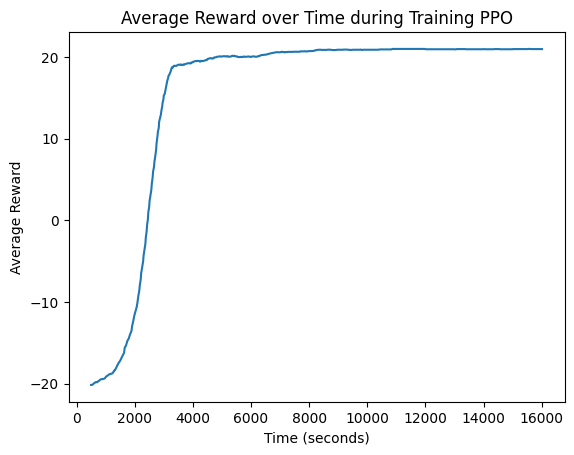

In [24]:
import matplotlib.pyplot as plt
# Compute a rolling mean with a window size of 50 for the reward
results['reward_mean'] = results['r'].rolling(window=50).mean()
# Plot the smoothed reward over time
plt.plot(results['t'], results['reward_mean'])
plt.xlabel('Time (seconds)')
plt.ylabel('Average Reward')
plt.title('Average Reward over Time during Training PPO')
plt.show()

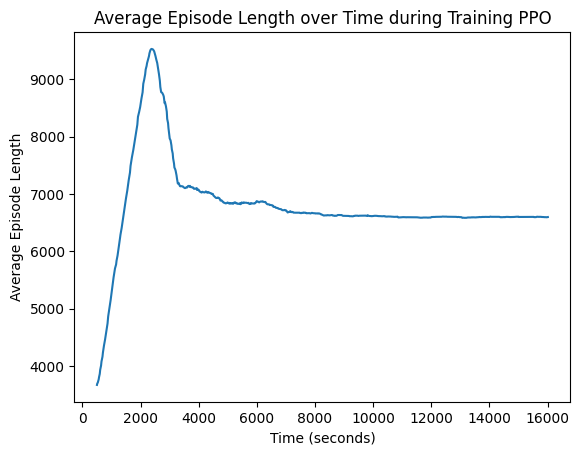

In [25]:
import matplotlib.pyplot as plt
# Compute a rolling mean with a window size of 50 for the episode length
results['episode_length'] = results['l'].rolling(window=50).mean()
# Plot the smoothed episode length over time
plt.plot(results['t'], results['episode_length'])
plt.xlabel('Time (seconds)')
plt.ylabel('Average Episode Length')
plt.title('Average Episode Length over Time during Training PPO')
plt.show()

In [8]:
#Evaluationg our trained agent over 1000 timesteps
!python -m rl_zoo3.enjoy  --algo ppo  --env PongNoFrameskip-v4  --no-render  --n-timesteps 10000  --folder logs/

Loading latest experiment, id=7
Loading logs/ppo/PongNoFrameskip-v4_7/PongNoFrameskip-v4.zip
A.L.E: Arcade Learning Environment (version 0.10.1+unknown)
[Powered by Stella]
Stacking 4 frames
Atari Episode Score: 21.00
Atari Episode Length 6526
Atari Episode Score: 21.00
Atari Episode Length 6621
Atari Episode Score: 21.00
Atari Episode Length 6621
Atari Episode Score: 21.00
Atari Episode Length 6526
Atari Episode Score: 21.00
Atari Episode Length 6613
Atari Episode Score: 21.00
Atari Episode Length 6613


In [ ]:
#Record a video using the best saved model
!python -m rl_zoo3.record_video  --algo ppo --env PongNoFrameskip-v4  --load-best  --n-timesteps 1000  --folder logs/

In [28]:
from IPython.display import Video

video_path = "./test/rl-baselines3-zoo/logs/ppo/PongNoFrameskip-v4_7/videos/best-model-ppo-PongNoFrameskip-v4-step-0-to-step-1000.mp4"
Video(video_path, embed=True)